In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [34]:
from configuration import *
import pandas as pd

from spikeinterface.sortingcomponents.benchmark.benchmark_motion_correction import BenchmarkMotionCorrectionMearec

from figure_interpolation import (figure_sorting_accuracies,
                                  figure_sorting_accuracies_with_best_merge,
                                  figure_sorting_accuracies_depth_snr)

In [53]:
figure_folder = base_folder / 'figures' / 'interpolation'
figure_folder.mkdir(exist_ok=True, parents=True)

ext = 'png'
# ext = 'pdf'

## impact on sorting accuracy

In [24]:
drift_cases = [
    ('uniform', 'homogeneous', 'rigid'),
    ('uniform', 'homogeneous', 'non-rigid'),
    ('uniform', 'homogeneous', 'bumps'),
]

interpolation_method = 'kriging'

In [15]:
benchmarks = {}
for cells_position, cells_rate, drift_mode  in drift_cases:
    benchmark_folder = base_folder / 'bench_correction' / f'{probename}_{drift_mode}_{cells_position}_{cells_rate}' / f'{interpolation_method}'
    bench = BenchmarkMotionCorrectionMearec.load_from_folder(benchmark_folder)
    benchmarks[(cells_position, cells_rate, drift_mode)] = bench    

### ordered accuracies

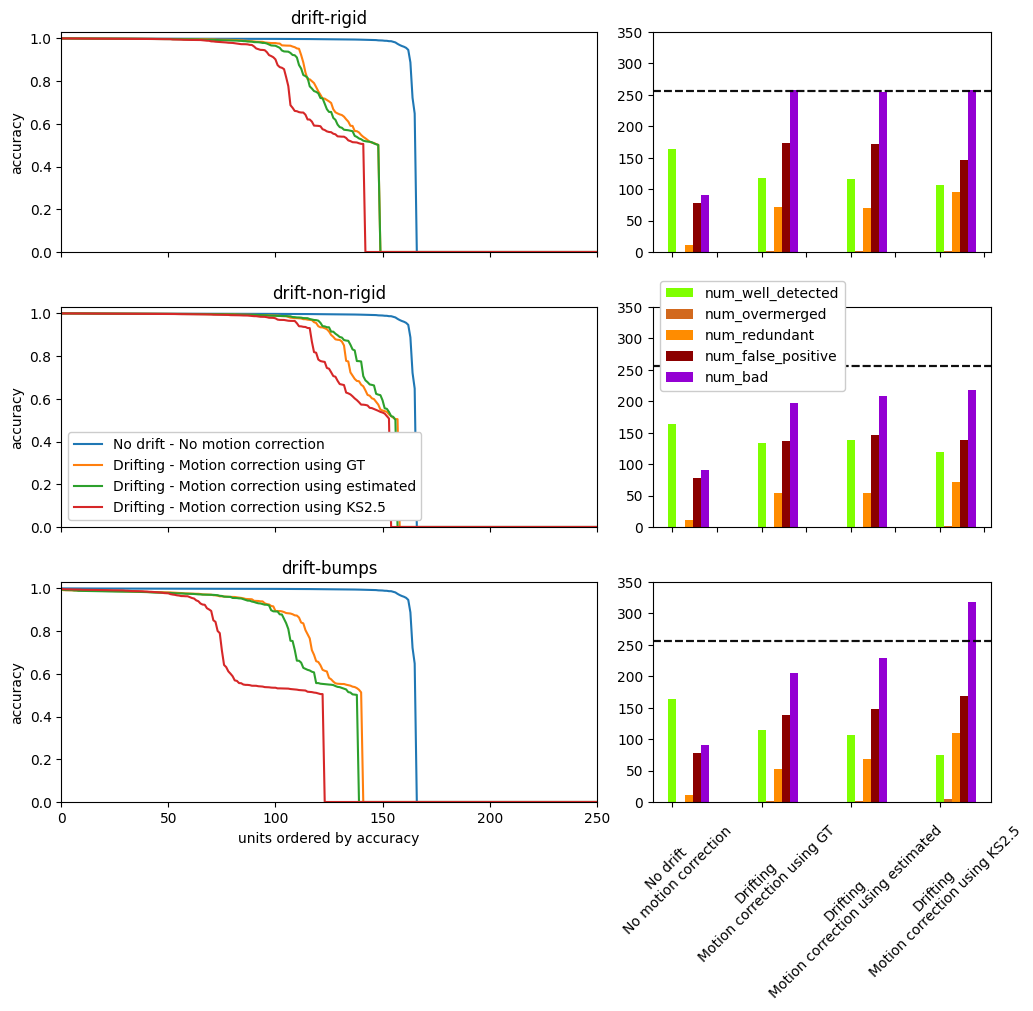

In [54]:
fig = figure_sorting_accuracies(benchmarks, figsize=(12, 10))
fig.savefig(figure_folder / f'Figure4 sorting accuracies.{ext}')

## ordered accurcies with best merge

Here we are computing a "best merge" knowing the ground truth.
Even, this is not somethign which doable on real data, it show the limit of the theoritical possible accuracies.

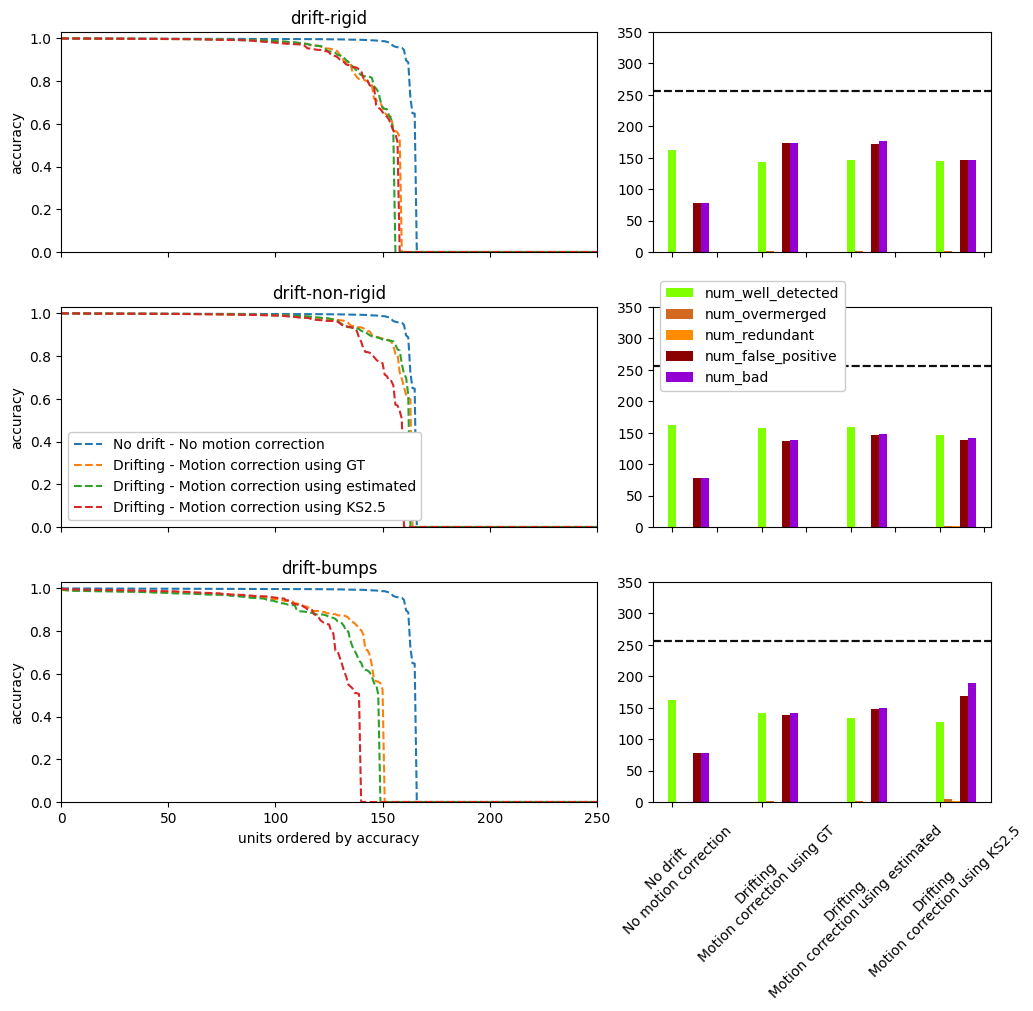

In [55]:
fig = figure_sorting_accuracies_with_best_merge(benchmarks, merging_score=0.2, figsize=(12, 10))
fig.savefig(figure_folder / f'Figure6supp sorting best merge accuracies.{ext}')

### accuracies by detph and snr

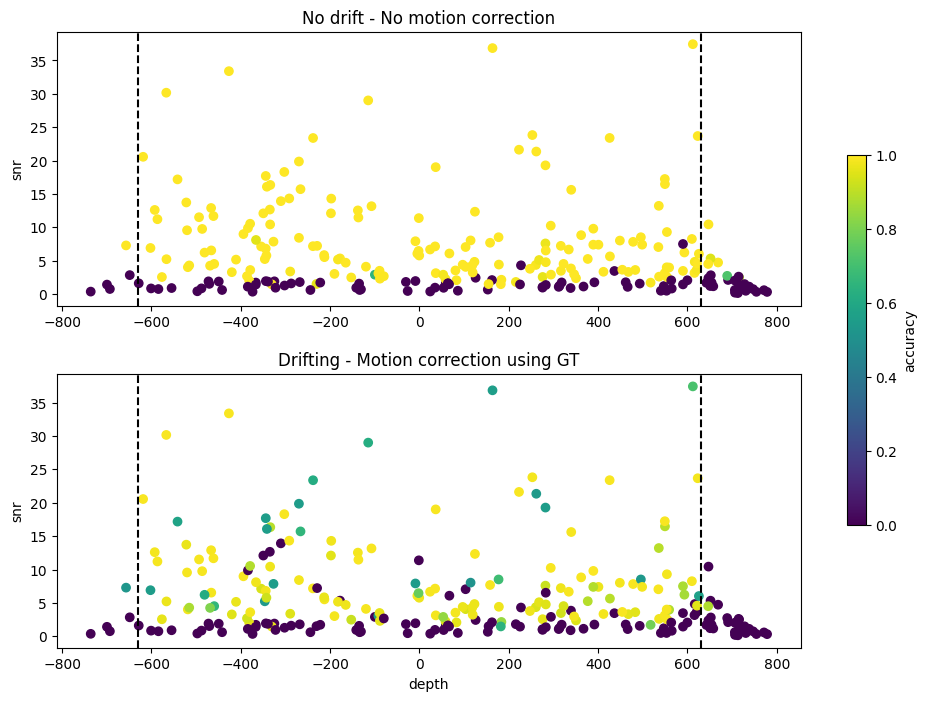

In [59]:
bench = benchmarks[('uniform', 'homogeneous', 'bumps')]
sorter_cases = bench.sorter_cases
bench.sorter_cases = sorter_cases[:2]
fig = figure_sorting_accuracies_depth_snr(bench, figsize=(12, 8))
fig.savefig(figure_folder / f'Figure6_AccuracyByDepthSnr.{ext}')
bench.sorter_cases = sorter_cases